# Housing Data Project

This notebook is to answer some questions posed by a hypothetical government looking at factors affecting home values, education, and pollution in towns surrounding Boston. The questions are:

1. Is there a significant difference in the median value of houses bounded by the Charles river or not?
2. Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
3. Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?


In [83]:
#import libraries needed for this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
import statsmodels.api as sm

Data source provided by IBM. Note from class "This data was modified for this course and the link to the complete dataset can be found in the [sklearn.datasets library.](http://https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)

--------

Read the data into a dataframe. 

In [35]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
#examine the first rows of data to get a sense of it
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Median Value of Homes
Median value of owner occupied homes boxplot. 

Text(0, 0.5, 'title')

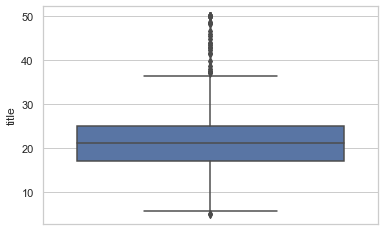

In [12]:
sns.set(style="whitegrid")
ax = sns.boxplot( y='MEDV', data=boston_df)
ax.set_ylabel("MEDV")
ax.set_title("Median value of owner-occupied homes in $1000's")
#ax2 = sns.swarmplot(y='MEDV', data=boston_df, color="0.25")

## Median value by town's proximity to Charles river

Provide a  histogram for the Charles river variable. The Charles river is a "dummy" variable that is Yes = 1 or No = 0 indicating whether the property bounds the river. So I am interpreting this as to make a histogram for the Median Value based on whether it is or is not near the river. 

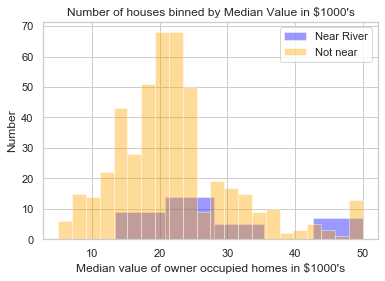

In [31]:
sns.distplot(boston_df[boston_df['CHAS']== 1]['MEDV'], color="blue", kde=False)
ax =sns.distplot(boston_df[boston_df['CHAS']== 0]['MEDV'], color="orange",kde=False)
ax.set_title("Number of houses binned by Median Value in $1000's")
ax.set_xlabel("Median value of owner occupied homes in $1000's")
ax.set_ylabel("Number")
ax.legend(['Near River', 'Not near'])

plt.show()
#Results show many more houses not near river and the homes near river have two groups of values.

**Ranges of values for owner occupied homes grouped by age.**
Age groups of 35 years and younger, between 35 and 70 years and 70 years and older. This new information will be called AGE_GROUP.

In [36]:
#set up a new data category for grouping the ages in our data frame
boston_df.loc[(boston_df['AGE']<= 35) ,'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70),'AGE_GROUP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE']>= 70) ,'AGE_GROUP'] = '70 years and older'
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_GROUP
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


## Median Value by Age
Show the three age groupings as boxplots. 

Text(0.5, 0, '')

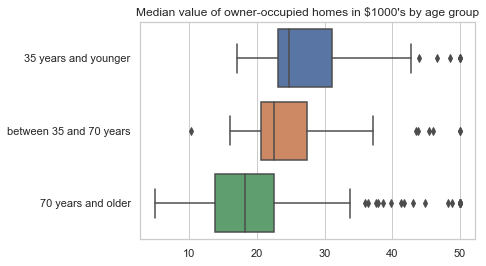

In [45]:
ax = sns.boxplot(y="AGE_GROUP", x='MEDV', data=boston_df,
                order =['35 years and younger','between 35 and 70 years','70 years and older'])
ax.set_title("Median value of owner-occupied homes in $1000's by age group")
ax.set_ylabel("")
ax.set_xlabel("")
#Results indicate lower values on average for older homes. 

## Nitric Oxide and Non-Retail Acres
Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 0, 'Number of non-retail business acres')

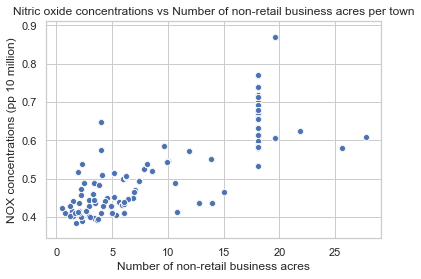

In [51]:
ax=sns.scatterplot(x='INDUS',y="NOX", data=boston_df)
ax.set_title("Nitric oxide concentrations vs Number of non-retail business acres per town")
ax.set_ylabel("NOX concentrations (pp 10 million)")
ax.set_xlabel("Number of non-retail business acres")

*The nitric oxide concentrations seem to be correlated positively with the larger number of non-retail business acres in towns. *

## Pupil to teacher ratio 
Create a histogram for the pupil to teacher ratio variable.


Text(0.5, 0, 'pupil to teacher ratio')

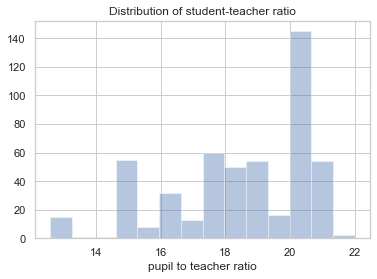

In [56]:
ax=sns.distplot(boston_df['PTRATIO'], kde=False)
ax.set_title("Distribution of student-teacher ratio")
ax.set_xlabel("pupil to teacher ratio")

# Is there a significant difference in the median value of homes in towns bounded by the Charles river?
The initial histograms of the median values of homes bounding the river as compared with those that are not are hard to interpret as the values for the homes in towns on the river are not normally distributed. 

State the hypothesis

* $H_0$: $x = µ_1$ ("The median value of homes in towns bounded by the river is not different from the median value of homes in towns not bounded by the river")
*   $H_1$: $x ≠ µ_1$ ("The median value of homes in towns bounded by the river is different from the median value of homes in towns not bounded by the river")

We will use the T-test for independent samples. It is not clear to me that this is an appropriate test as the homes in towns bounded by the river do not appear to follow a normal distribution. However, this is what we were asked to use as a test. The two groups are independent and the dependent variable is continuous.

In [59]:
#First check the variances to see if they are equal
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

# since the p-value is less than 0.05 we can assume variance of the two samples is NOT equal



LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

In [60]:
#Use the ttest_ind from the scipy_stats library. 
# The variances are not equal so set the equal variance flag to false. 
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

**Conclusion:** Since the p-value is less than $\alpha$ value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median values of homes in towns bounding the river as compared to those not bounding the river. Homes in towns near the river have a higher median value. 


## Does age group affect Median values of homes?

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? We have 3 age groups defined. We will look at the median prices in these categories and compare the three averages using the ANOVA test. 
The three age groups are:
- Age groups of 35 years and younger,
- between 35 and 70 years, 
- 70 years and older.
State the hypothesis

* $H_0$: $\mu_1=\mu_2 =\mu_3$ The average (or mean) of the median value of homes in each age group is the same.
*   $H_1$: At least one of the means is different.

First check whether the variances on the three populations is equal. 

In [61]:
scipy.stats.levene(boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'],
boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV'],
boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV'], center='mean')

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

Since the p-value is greater than 0.05, the variances are equal. Also, the boxplot distributions for the three populations suggest normal distributions. But we can check that. 

Check normal distributions for 3 populations. Create 3 sample variables and run the one-way ANOVA. ANOVA works on categorical variables. 

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


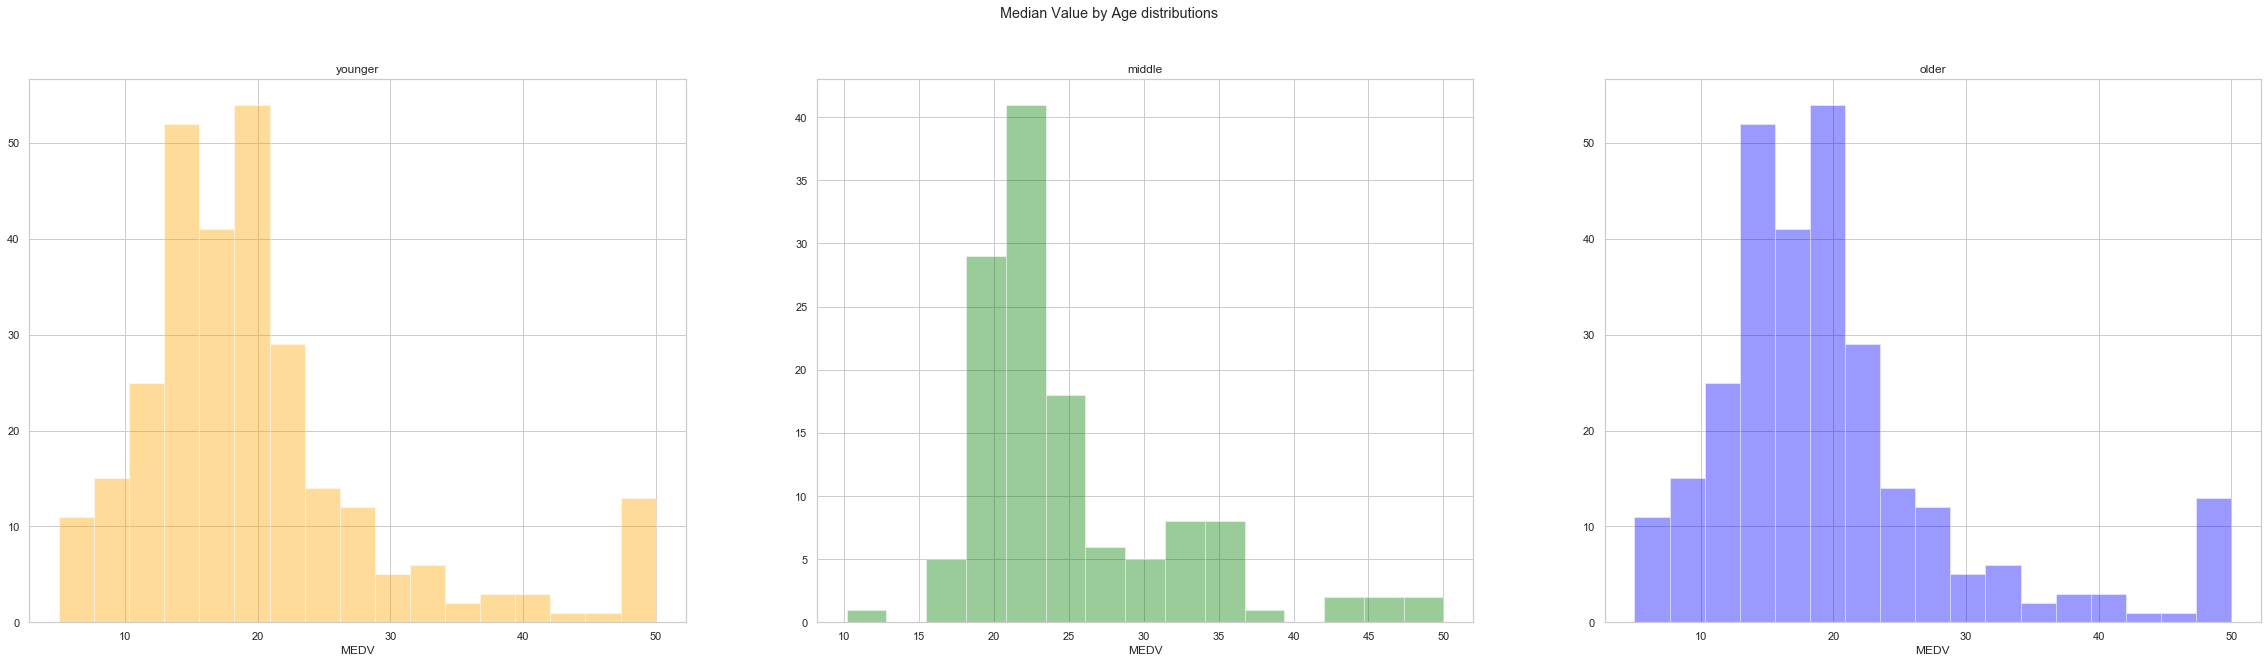

In [77]:
younger = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
middle = boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV']
older = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

fig, axes = plt.subplots(1,3, figsize=(40,10))
fig.suptitle('Median Value by Age distributions')
sns.distplot(older, ax=axes[0], kde=False, color="orange")
axes[0].set_title("younger")
sns.distplot(older, ax=axes[2], kde=False, color="blue")
axes[2].set_title("older")
sns.distplot(middle, ax=axes[1], kde=False, color="green")
axes[1].set_title("middle")

f_statistic, p_value = scipy.stats.f_oneway(younger, middle, older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

** Conclusion **
The p value is much less than $\alpha =0.05$ indicating we must reject our null hypothesis that the mean of the median home values is the same for each age group. The averages are not all three the same. 

## Is there a relationship between NOX concentrations and non-retail business footprint?
Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?  We will use the Pearson R package in the scipy.stats package and check for the correlation. Our scatter graph suggests there is a correlation. 

The Pearson R test requires normal distributions. Plot the distributions first. Then run the test. 
The hypothesis:
- $H_0$: Nitric Oxide concentrations are not correlated with proportion of non-retail businss acres per town.
- $H_1$: Nitric Oxide concentrations are correlated with proportion of non-retail businss acres per town.


coefficient: 0.763651446920915, P-Value: 7.913361061239593e-98


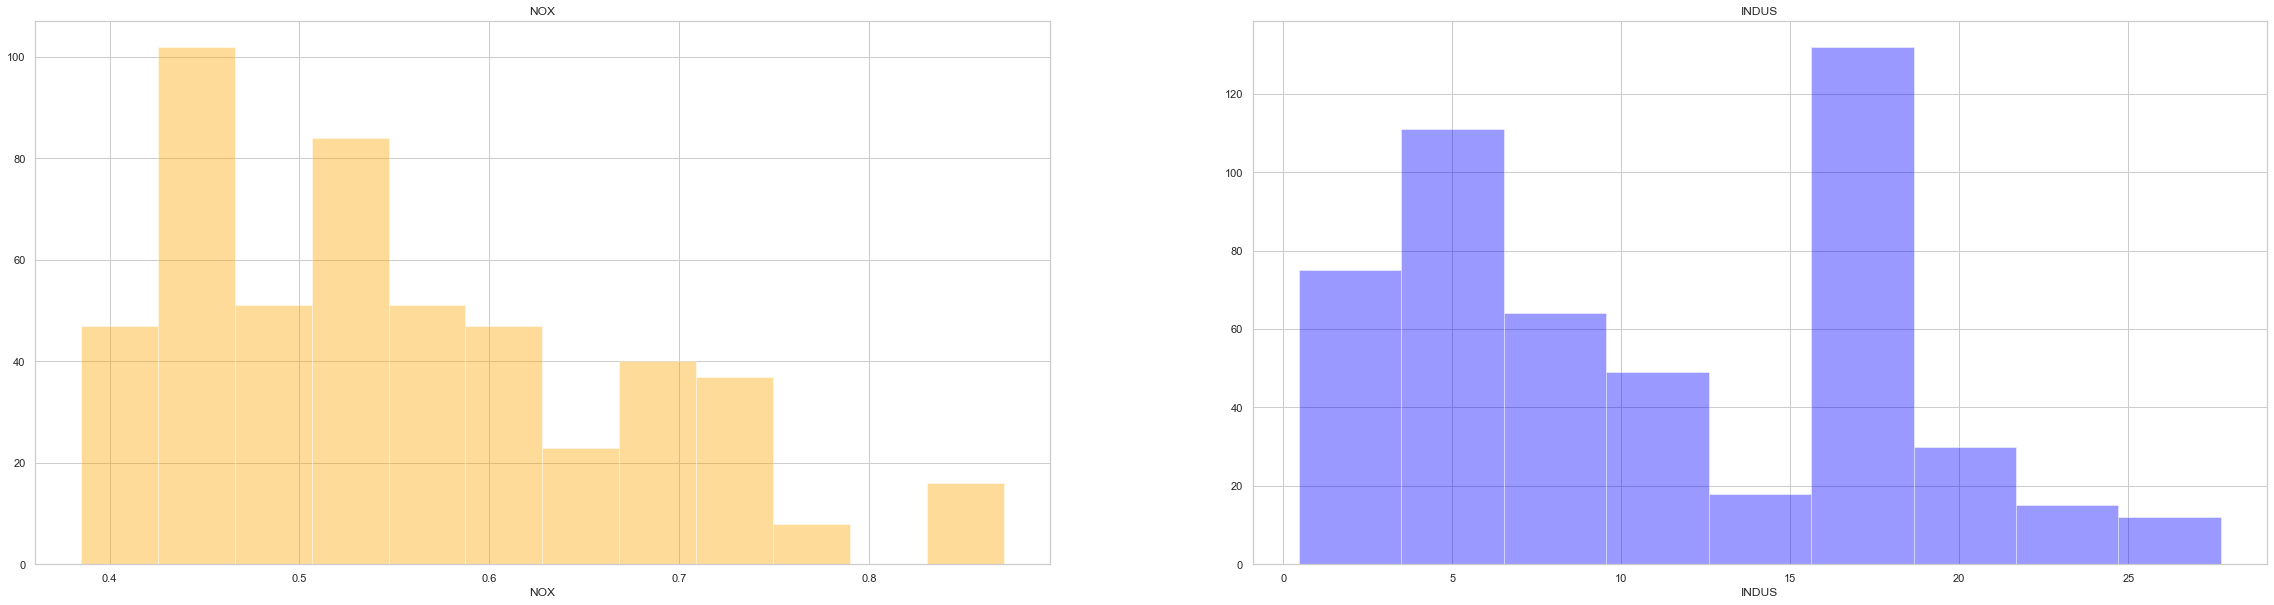

In [81]:
fig, axes = plt.subplots(1,2, figsize=(40,10))
sns.distplot(boston_df["NOX"], ax=axes[0], kde=False, color="orange")
axes[0].set_title("NOX")
sns.distplot(boston_df["INDUS"], ax=axes[1], kde=False, color="blue")
axes[1].set_title("INDUS")
coeff, pvalue = scipy.stats.pearsonr(boston_df["INDUS"],boston_df["NOX"])
print("coefficient: {0}, P-Value: {1}".format(coeff,pvalue))

**Conclusion:** Although the distributions do not look very normal, there is a strong positive correlation and the p-value < 0.05. The null hypothesis is rejected. These two factors are correlated. 

## Does distance to employment centers affect median home value?
What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? We will answer this question with a regression analysis.
The hypothesis:
- $H_0$: Median home values in a town are not correlated with weighted distance to the five Boston employment centers.
- $H_1$: Median home values in a town are correlated with weighted distance to the five Boston employment centers.

Plot the data first. 


Text(0, 0.5, 'Median home values (MEDV)')

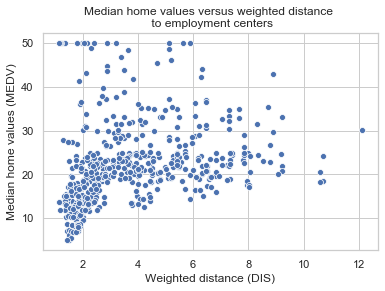

In [99]:
ax=sns.scatterplot(x='DIS',y="MEDV", data=boston_df)
ax.set_title("Median home values versus weighted distance \n to employment centers")
ax.set_xlabel("Weighted distance (DIS)")
ax.set_ylabel("Median home values (MEDV)")

In [129]:
y = boston_df['MEDV']
X = boston_df['DIS'] # the independent variable
# add a constant just in case the intercept is not 0
X=sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()
#dir(model) #listing of what is in model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           1.21e-08
Time:                        23:47:45   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, "Median value in $1,000's")

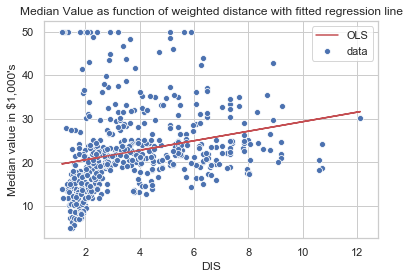

In [128]:
fig,ax = plt.subplots()
#ax.plot(X,y,"o", label="data")
#ax.plot(X,model.fittedvalues, "r--.", label="OLS")
ax.plot(X['DIS'],predictions, "r-", label="OLS")  
sns.scatterplot(y="MEDV",x="DIS", data=boston_df, label="data")
ax.set_title("Median Value as function of weighted distance with fitted regression line")
ax.set_ylabel("Median value in $1,000's")
#hints on how to get fit added to graph from https://www.statsmodels.org/devel/examples/notebooks/generated/ols.html

**Conclusion **

We reject the null hypothesis. The weighted distance affects the median value. The equation is MEDV = (1.0916)DIS +18.3901 which implies the Median Home Value increases with the weighted distance to employment centers. The p value for the slope is < 0.05. The $r^2$ value indicates the model explains only 6.2% of the variance in the Median home prices. 


In [ ]:
#things I learned/saw in the notebooks I reviewed. 
#histogram option bins = bin_edges and then plt.xticks(bin_edges) for sns.histplot. 